In [ ]:
import sympy
from sympy import Matrix, latex
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
import matplotlib.pyplot as plt
from IPython.display import Latex

# Практическое занятие 13
# Компьютерный практикум по алгебре на Python
## Линейные операторы на плоскости и в пространстве
### Задание 1.
Написать функцию, составляющую матрицу линейного оператора поворота на $\alpha$ градусов или радиан **по** или **против часовой стрелки** на плоскости. Параметры: обязательные - угол поворота, необязательные - тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). Значения по умолчанию - против часовой стрелки в радианах.

Использовать полученную функцию для выведения на экран координат векторов, полученных поворотом вектора [1, 2]

1) на 10, 20, 45 градусов **по  часовой стрелке**

2) на $\pi/3$ радиан **против часовой стрелки**.

In [ ]:
def to_radian(a):
  return a*Pi/180
for alpha in [to_radian(10), to_radian(20), to_radian(45), -Pi/3]:
  e = Matrix([1, 2])
  alpha *= -1
  A = Matrix([[Cos(alpha), -Sin(alpha)], [Sin(alpha), Cos(alpha)]])
  display(Latex(f'Ae_1 = {latex(A * e)}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2.
Найти собственные числа и собственные векторы линейного оператора, заданного матрицей
$$
\left(\begin{matrix}
-34&20&-5\\
-40&56&-20\\
20&-8&50
\end{matrix}\right)
$$
Воспользоваться eigenvals и eigenvects, проверить выполнение равенства нулю характеристического многочлена $|A-\lambda E|$ и условия $Ax=\lambda x$.


In [ ]:
A = Matrix([[-34, 20, -5],
            [-40, 56, -20],
            [20, -8, 50]])
res_vec = A.eigenvects()
display(Latex(latex(res_vec)))

<IPython.core.display.Latex object>

In [ ]:
a = A.eigenvals()
list(a.keys())

[56, 40, -24]

In [ ]:
lam = sympy.symbols('lamda')
lambdas = sympy.solve((A - lam * sympy.eye(3)).det())
display(Latex('\lambda = ' + ',\ '.join(['{}'] * len(lambdas)).format(*lambdas)))

<IPython.core.display.Latex object>

### Задание 3.
Построить матрицу оператора из задания 2 в базисе из векторов $(1,1,1)$, $(0,5,3)$ и $(1,6,0)$.Вывести на экран матрицу перехода к новому базису и матрицу оператора в новом базисе.


In [ ]:
P = Matrix([[1, 0, 1], [1, 5, 6], [1, 3, 0]])
A_new = P**(-1) * A * P
display(Latex(f'P = {latex(P)}, A_{{new}} = {latex(A_new)}'))

<IPython.core.display.Latex object>

### Задание 4.
Построить матрицу оператора из задания 2 в базисе из собственных векторов с помощью eigenvects и матрицы перехода. Сравнить диагональные элементы с собственными числами.

In [ ]:
P = res_vec[0][2][0].row_join(res_vec[1][2][0]).row_join(res_vec[2][2][0])
display(Latex(f'P = {latex(P)}'))

<IPython.core.display.Latex object>

In [ ]:
#диагональные элементы с собственными числами совпадают
display(P**(-1)*A*P)

Matrix([
[-24,  0,  0],
[  0, 40,  0],
[  0,  0, 56]])

### Задание 5*.
Изобразить на графике вектор $a(-1, 1)$ и результаты его поворота

1) на 30, 45, 90 градусов **по  часовой стрелке** (имена $v_1$, $v_2$, $v_3$)

2) на $\pi/6$ и $2\pi/3$ радиан **против часовой стрелки** (имена $w_1$, $w_2$).

**Указание:** описать функцию, возвращающую угол поворота на плоскости против часовой стрелки в радианах. Агрументы функции: угол поворота, тип меры угла (градусы или радианы), направление поворота (по или против часовой стрелки). С помощью этой функции  составить словарь с ключами - именами векторов, значениями - углами  поворота против часовой стрелки в радианах, использовать в цикле этот словарь для изображения векторов на графике.

В легенде графика для каждого вектора указать его имя и координаты. Для корректного представления координат в легенде нужно отдельно выделить каждую координату.

In [ ]:
def lin_opr(e, alpha, mea_rad = True,clockwise = True):

  # mea_rad = True если радианы. Если в градусах то False
  # clockwise = True если по часовой стрелке. Иначе False


  if not mea_rad:
    alpha = to_radian(alpha)

  if clockwise:
    alpha *= -1
    A = Matrix([[Cos(alpha), -Sin(alpha)], [Sin(alpha), Cos(alpha)]])
    return A*e
  A = Matrix([[Cos(alpha), -Sin(alpha)], [Sin(alpha), Cos(alpha)]])
  return A*e

a = Matrix([-1, 1])
dic_res = {"v1": lin_opr(a, 30, False),
           "v2":lin_opr(a, 45, False),
           "v3":lin_opr(a, 90, False),
           "w1":lin_opr(a, Pi/6, True, False),
           "w2":lin_opr(a, 2*Pi/3, True, False)}

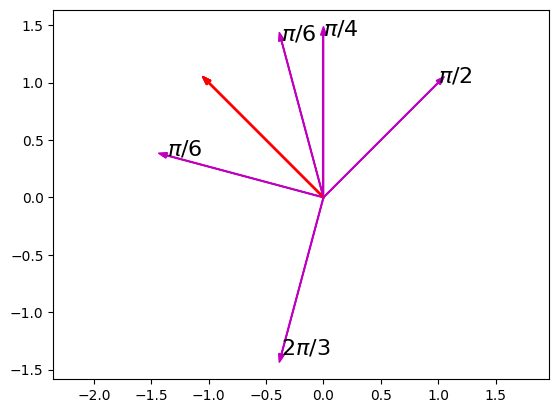

In [ ]:
def plotvec(vect, **kwargs):
    x, y = [float(item) for item in vect]
    plt.plot([0, x], [0, y], **kwargs)
    plt.arrow(0, 0, x, y, head_width=0.05, **kwargs)
    return None

def plotvecs(*vecscolors):
    for item in vecscolors:
        plotvec(item[0], color=item[1])
    return None

angles = [to_radian(30), to_radian(45), to_radian(90), Pi/6, 2*Pi/3]

for key, val, alpha in zip(dic_res.keys(), dic_res.values(), angles):
  plotvecs((a, "r"), (val, "m"))
  plt.axis('equal')
  plt.annotate(latex(alpha, mode='inline'), xy=(val[0], val[1]), fontsize=16)

# Задание 6*
Считать из файла "task_13_6.xlsx" координаты векторов на плоскости и углы поворота (крайний левый столбец в файле содержит имена векторов, следующие два - координаты векторов, затем угол поворота и последний столбец содержит текст "rad" или "deg", т.е. угол в радианах или градусах).

Для каждого вектора найти координаты вектора, полученного в результате поворота, затем записать в файл  "task_13_6_ans.xlsx" имена векторов  из файла "task_13_6.xlsx" и координаты  векторов, полученных в результате поворота. В файле  "task_13_6_ans.xlsx" подписи строк - имена векторов, подписи столбцов - имена координат, т.е. "x" и "y".

Изобразить на графике вектор [1, 2] из Задания 1 и результаты его поворота (по Заданию 1). В легенде графика для каждого вектора, кроме [1, 2] указать матрицу поворота, а для [1, 2] единичную матрицу.

In [ ]:
from google.colab import files
uploaded = files.upload()
for file_name in uploaded.keys():
    print(f'Загружен файл {file_name}')

Saving task_13_6.xlsx to task_13_6.xlsx
Загружен файл task_13_6.xlsx


In [ ]:
import pandas as pd
df = pd.read_excel(file_name, sheet_name='Sheet1')
df

,Unnamed: 0,x,y,angle,type
0,v,3,2,30.00,deg
1,w,-1,0,3.14,rad
2,vect,3,-3,-1.57,rad
3,a,-2,-1,60.00,deg
4,n,-1,0,-1.05,rad


In [ ]:
res = []
for i in range(5):
  e = Matrix([df["x"][i], df["y"][i]])
  if df["type"][i]=="deg":
    res.append(lin_opr(e, df["angle"][i]))
  else:
    res.append(lin_opr(e, df["angle"][i], False))

df["result"] = res

In [ ]:
with pd.ExcelWriter("task_13_6_ans.xlsx", mode = "w") as writer:
      df.to_excel(writer, sheet_name="Sheet1",  index=False)

In [ ]:
files.download("task_13_6_ans.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

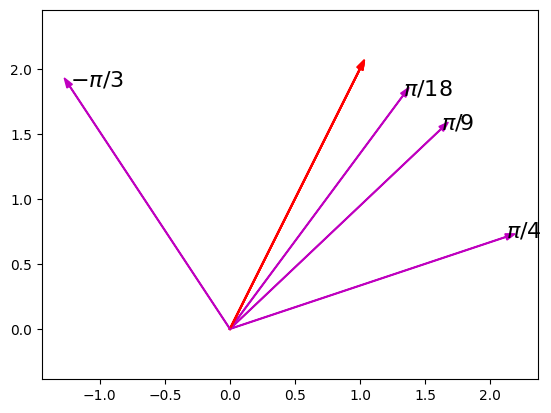

In [ ]:
for alpha in [to_radian(10), to_radian(20), to_radian(45), -Pi/3]:
  e = Matrix([1, 2])

  A = Matrix([[Cos(-alpha), -Sin(-alpha)], [Sin(-alpha), Cos(-alpha)]])
  angles = [to_radian(30), to_radian(45), to_radian(90), Pi/6, 2*Pi/3]


  plotvecs((e, "r"), (A*e, "m"))
  plt.axis('equal')
  plt.annotate(latex(alpha, mode='inline'), xy=((A*e)[0], (A*e)[1]), fontsize=16)

###  Индивидуальное задание
Найти собственные числа и собственные векторы линейного оператора. Построить матрицу оператора в заданном базисе. Построить матрицу оператора в базисе из собственных векторов.

Вывести на экран матрицу оператора А, матрицу перехода к базису ($e_1$, $e_2$, $e_3$), матрицу оператора в базисе ($e_1$, $e_2$, $e_3$), матрицу перехода к базису из собственных векторов, матрицу оператора в базисе из собственных векторов.

Даны матрица оператора A, векторы базиса $e_1$, $e_2$, $e_3$.

In [ ]:
# 21

A = Matrix([[-185, -3, -348],
      [103, -35, 244],
      [76, -12, 164]])
e1 = Matrix([-1, 1, 2])
e2 = Matrix([1, 3, 2])
e3 = Matrix([-4, -2, 1])

In [ ]:
print("Собственные вектора:")
res_vec = A.eigenvects()
display(Latex(latex(res_vec)))

Собственные вектора:


<IPython.core.display.Latex object>

In [ ]:
print("Собственные числа:")
a = A.eigenvals()
list(a.keys())

Собственные числа:


[16, -28, -44]

In [ ]:
P = res_vec[0][2][0].row_join(res_vec[1][2][0]).row_join(res_vec[2][2][0])
P
A_new = P**(-1)*A*P
print("Матрица перехода и оператора в собственных векторах")
display(Latex(f'P = {latex(P)}, A_{{new}} = {latex(A_new)}'))

Матрица перехода и оператора в собственных векторах


<IPython.core.display.Latex object>

In [ ]:
P1 = sympy.Matrix.hstack(e1, e2, e3)
A_new1 = P**(-1) * A * P
print("Матрица перехода и оператора в векторах (e1, e2, e3)")
display(Latex(f'P_1 = {latex(P1)}, A_{{new1}} = {latex(A_new1)}'))

Матрица перехода и оператора в векторах (e1, e2, e3)


<IPython.core.display.Latex object>